<a href="https://colab.research.google.com/github/al34n1x/DataScience/blob/master/99.Machine_Learning/09_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Clasificación: Regresión Logística

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm




En este notebook vamos a estudiar los conceptos básicos de Clasificación y como podemos aplicarla usando la API de scikit-learn. Nos focalizaremos en Regresión Logística, pero veréis que es muy fácil aplicar otros algoritmos con la api de scikit-learn.



Para empezar, vamos a crear un dataset sintético que podamos aplicar en nuestro primer problema de clasificación.
Será un problema de clasificación binaria en el que, para ir entendiendo los conceptos, sólo utilizaremos dos predictores.

In [3]:
from sklearn.datasets import make_blobs

X, y = make_blobs(centers=2, random_state=0, n_samples=200)

print('X ~ n_samples x n_features:', X.shape)
print('y ~ n_samples:', y.shape)

print('\nFirst 5 samples:\n', X[:5, :])
print('\nFirst 5 labels:', y[:5])

X ~ n_samples x n_features: (200, 2)
y ~ n_samples: (200,)

First 5 samples:
 [[2.8219307  1.25395648]
 [1.65581849 1.26771955]
 [3.12377692 0.44427786]
 [1.4178305  0.50039185]
 [2.50904929 5.7731461 ]]

First 5 labels: [1 1 1 1 0]




Como hemos hecho que nuestros datos sean bidimiensionales, podemos mostrarlos en un plot 2D donde la primera característica corresponda al eje *x* y la segunda característica al eje *y*. 

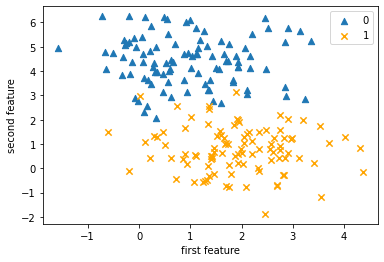

In [4]:
plt.scatter(X[y == 0, 0], X[y == 0, 1], s=40, label='0', marker='^')
plt.scatter(X[y == 1, 0], X[y == 1, 1], s=40, label='1', c='orange', marker='x')

plt.xlabel('first feature')
plt.ylabel('second feature')
plt.legend(loc='upper right');



Para evaluar los modelos que vamos a crear, vamos a separar el dataset en *train* y *test*. Recordad que estos dos conjuntos nos permiten:

1. **Training**: Ajustar el modelo a los datos de entrenamiento.
2. **Test**: Evaluar la capacidad de generalizar del modelo.


Para separar los dos conjuntos utilizamos la función `train_test_split` del módulo `model_selection`. Separaremos ambos conjuntos con un ratio de 75/25.

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=1234,
                                                    stratify=y)   # Attention: we pass the "y"

In [6]:
X_train.shape

(150, 2)

In [7]:
y_train.shape

(150,)



Todos los algoritmos implementados en scikit-learn están expuestos en su API mediante objetos de tipo *Estimator*, que garantiza que todos los modelos disponen de la misma API:

- `Estimator.`**`fit(X, y)`**: ajusta los parámetros del modelo a los datos
- `Estimator.`**`predict(X)`**: predicce los valores de salida para datos nuevos
- `Estimator.`**`score(X, y)`**: evalúa los resultados de la predicción

Nosotros utilizaremos el objeto LogisticRegression para nuestra tarea de clasificación:

In [0]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()



Para entrenar el modelo, simplemente tenemos que llamar al método **`fit`** de nuestro objeto `classifier`, indicándole los datos de entrenamiento y las etiquetas asociadas a esos datos: 

In [9]:
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
classifier.coef_

array([[ 0.89634307, -2.62074832]])

In [11]:
classifier.intercept_

array([5.14609874])



Una vez tenemos el modelo entrenado, podemos empezar a realizar predicciones con datos nuevos:

In [12]:
prediction = classifier.predict(X_test)
prediction

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1])

In [13]:
classifier.predict_proba(X_test).round(2)

array([[0.01, 0.99],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.98, 0.02],
       [0.99, 0.01],
       [0.  , 1.  ],
       [0.99, 0.01],
       [0.04, 0.96],
       [0.74, 0.26],
       [0.17, 0.83],
       [0.9 , 0.1 ],
       [0.07, 0.93],
       [0.  , 1.  ],
       [0.34, 0.66],
       [0.01, 0.99],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.5 , 0.5 ],
       [0.93, 0.07],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.97, 0.03],
       [0.89, 0.11],
       [0.37, 0.63],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [0.99, 0.01],
       [0.02, 0.98],
       [0.36, 0.64],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.99, 0.01],
       [1.  , 0.  ],
       [0.99, 0.01],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [0.93, 0.07],
       [1.  , 0.  ],
       [0.01, 0.99],
       [0.58, 0.42],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [1.  ,



Podemos comparar visualmente las predicciones con los valores de $y$ reales:

In [14]:
print(prediction[:20])
print(y_test[:20])

[1 0 0 1 0 0 1 0 1 0 1 0 1 1 1 1 0 0 0 0]
[1 0 0 1 0 0 1 0 1 0 1 0 1 1 1 1 0 0 1 0]




Para evaluarlo cuantitativamente, podemos computar qué fracción de las predicciones es correcta. A esta métrica se le llama **accuracy**:

In [15]:
np.mean(prediction == y_test)

0.92



Por supuesto, scikit-learn nos provee la función **`score`** para computar el **accuracy** directamente:

In [16]:
classifier.score(X_test, y_test)

0.92

In [17]:
classifier.score(X_train, y_train)

0.9866666666666667

In [0]:
#dir(classifier)



Suele ser muy útil comparar la capacidad de generalización del modelo en el conjunto de test con el accuracy en los datos de entrenamiento (veremos por qué más adelante):




La Regresión Logística es un modelo linear, esto es, un modelo que crea una decisión que es lineal en el espacio de entrada. En nuestro dataset, esto significa que el umbral de decisión es una recta que separa las dos variables de entrada:

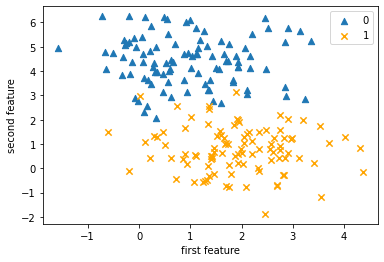

In [19]:
#from seaborn import figures
import numpy as np
import matplotlib.pyplot as plt

plt.scatter(X[y == 0, 0], X[y == 0, 1], s=40, label='0', marker='^')
plt.scatter(X[y == 1, 0], X[y == 1, 1], s=40, label='1', c='orange', marker='x')

plt.xlabel("first feature")
plt.ylabel("second feature")
#mglearn.plot_2d_separator(classifier, X)
plt.legend(loc='upper right');

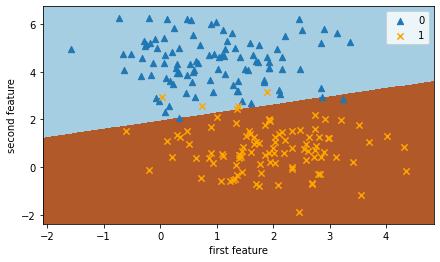

In [20]:
#from seaborn import figures
import numpy as np
import matplotlib.pyplot as plt




# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(7, 4))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)


plt.scatter(X[y == 0, 0], X[y == 0, 1], s=40, label='0', marker='^')
plt.scatter(X[y == 1, 0], X[y == 1, 1], s=40, label='1', c='orange', marker='x')

plt.xlabel("first feature")
plt.ylabel("second feature")
#mglearn.plot_2d_separator(classifier, X)
plt.legend(loc='upper right');



Podemos obtener otras métricas como F-Score, etc.

In [21]:
from sklearn.metrics import f1_score, precision_score, recall_score

print('Precision:', precision_score(y_test, prediction))
print('Recall:   ', recall_score(y_test, prediction))
print('Fscore:   ', f1_score(y_test, prediction))

Precision: 0.9565217391304348
Recall:    0.88
Fscore:    0.9166666666666666




Además es posible obtener los parámetros de la regresión:

In [22]:
print(classifier.coef_)
print(classifier.intercept_)

[[ 0.89634307 -2.62074832]]
[5.14609874]
